In [9]:
#Import API code

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
##Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data and used the local host URL generated in the browser. 

{'status': {'timestamp': '2024-02-18T20:22:46.332Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 8822}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10820, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [10]:
type(data)

dict

In [11]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [12]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10820,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.963141e+07,1.963141e+07,False,NaN,1,NaN,NaN,None,2024-02-18T20:21:00.000Z,51654.823035,1.638420e+10,-14.7267,-0.194695,0.580363,7.047844,22.803512,18.328209,37.570826,1.014057e+12,51.8975,1.084751e+12,None,2024-02-18T20:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:22:55.140689
1,1027,Ethereum,ETH,ethereum,8420,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201655e+08,1.201655e+08,True,NaN,2,NaN,NaN,None,2024-02-18T20:21:00.000Z,2823.427958,1.973238e+10,18.3170,-0.025766,1.779643,12.466372,13.208860,29.117813,38.507126,3.392785e+11,17.3767,3.392785e+11,None,2024-02-18T20:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:22:55.140689
2,825,Tether USDt,USDT,tether,74786,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.765741e+10,9.960008e+10,True,NaN,3,NaN,NaN,None,2024-02-18T20:20:00.000Z,1.000305,4.544978e+10,4.8550,-0.012741,-0.010058,0.004088,0.080652,0.017988,-0.049082,9.768714e+10,4.9994,9.963041e+10,None,2024-02-18T20:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-18 13:22:55.140689
3,1839,BNB,BNB,bnb,2068,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495443e+08,1.495443e+08,False,NaN,4,NaN,NaN,None,2024-02-18T20:20:00.000Z,350.567220,9.406711e+08,-13.1980,-0.070102,-0.616891,8.863837,11.827803,35.432321,35.990620,5.242532e+10,2.6830,5.242532e+10,None,2024-02-18T20:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:22:55.140689
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.407216e+08,5.698753e+08,True,NaN,5,NaN,NaN,None,2024-02-18T20:21:00.000Z,112.409216,1.457060e+09,7.1658,-0.293845,4.091290,3.738232,19.205229,38.545721,95.132888,4.954117e+10,2.5353,6.405923e+10,None,2024-02-18T20:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:22:55.140689
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.455860e+10,9.998790e+10,False,NaN,6,NaN,NaN,None,2024-02-18T20:21:00.000Z,0.556925,6.713090e+08,-29.1328,-0.341367,1.369956,5.405119,1.744303,-9.686414,-10.049293,3.038505e+10,1.5552,5.569251e+10,None,2024-02-18T20:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:22:55.140689
6,3408,USDC,USDC,usd-coin,16749,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.807140e+10,2.807140e+10,False,NaN,7,NaN,NaN,None,2024-02-18T20:20:00.000Z,1.000088,3.261425e+09,-14.4221,-0.008249,-0.001156,0.005649,-0.019767,0.004046,0.008689,2.807387e+10,1.4368,2.807387e+10,None,2024-02-18T20:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-18 13:22:55.140689
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.545833e+10,3.662821e+10,False,NaN,8,NaN,NaN,None,2024-02-18T20:20:00.000Z,0.617164,7.471631e+08,92.9408,-0.348881,5.145958,14.134802,23.538963,4.311689,59.939045,2.188359e+10,1.1199,2.777236e+10,None,2024-02-18T20:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:22:55.140689
8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.2

In [30]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    ##Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data and used the local host URL generated in the browser. 

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df._append(df2)
    
# Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\letom\OneDrive\Documents\PythonProjects\API.csv'):
        #df.to_csv(r'C:\Users\letom\OneDrive\Documents\PythonProjects\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\letom\OneDrive\Documents\PythonProjects\API.csv', mode='a', header=False)
        
    #Then to read in the file: 
    #df = pd.read_csv(r'C:\Users\letom\OneDrive\Documents\PythonProjects\API.csv')
    #df
    


In [31]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [32]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10820,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.963141e+07,1.963141e+07,False,NaN,1,NaN,NaN,None,2024-02-18T20:43:00.000Z,51712.487091,1.643012e+10,-14.1056,-0.178491,0.480015,7.392815,23.459808,18.221645,37.921319,1.015189e+12,51.9998,1.085962e+12,None,2024-02-18T20:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:43:39.237145,NaT
1,1027,Ethereum,ETH,ethereum,8420,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201655e+08,1.201655e+08,True,NaN,2,NaN,NaN,None,2024-02-18T20:43:00.000Z,2826.901595,1.993251e+10,19.7638,-0.329652,1.793778,12.975333,13.493011,28.821742,38.921014,3.396959e+11,17.3998,3.396959e+11,None,2024-02-18T20:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:43:39.237145,NaT
2,825,Tether USDt,USDT,tether,74786,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.765741e+10,9.960008e+10,True,NaN,3,NaN,NaN,None,2024-02-18T20:42:00.000Z,1.000240,4.576456e+10,5.8635,-0.021999,-0.005098,-0.023410,0.089996,0.025855,-0.059781,9.768080e+10,5.0034,9.962394e+10,None,2024-02-18T20:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-18 13:43:39.237145,NaT
3,1839,BNB,BNB,bnb,2068,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495443e+08,1.495443e+08,False,NaN,4,NaN,NaN,None,2024-02-18T20:42:00.000Z,349.879868,9.421377e+08,-13.1648,-0.533261,-0.827567,8.958683,11.609615,35.583749,35.787533,5.232253e+10,2.6801,5.232253e+10,None,2024-02-18T20:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:43:39.237145,NaT
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.407216e+08,5.698753e+08,True,NaN,5,NaN,NaN,None,2024-02-18T20:43:00.000Z,112.312252,1.472489e+09,8.2160,-0.451346,3.768471,4.399277,19.885538,39.533541,96.148821,4.949843e+10,2.5354,6.400398e+10,None,2024-02-18T20:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:43:39.237145,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1958,TRON,TRX,tron,930,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.804889e+10,8.804891e+10,True,NaN,11,7.165966e+10,9.675921e+09,None,2024-02-18T20:50:00.000Z,0.135026,2.342239e+08,-48.6015,-0.044920,-0.782428,8.688339,22.820946,31.371820,32.350872,1.188889e+10,0.6087,1.188890e+10,None,2024-02-18T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-18 13:51:36.347509
11,1975,Chainlink,LINK,chainlink,1645,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, sub...",1.000000e+09,5.871000e+08,1.000000e+09,False,NaN,12,NaN,NaN,None,2024-02-18T20:50:00.000Z,19.953974,3.290240e+08,-20.9171,-0.572276,-0.478893,-1.270347,28.191800,40.566948,35.253832,1.171498e+10,0.5997,1.995397e+10,None,2024-02-18T20:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,NaT,2024-02-18 13:51:36.347509
12,6636,Polkadot,DOT,polkadot-new,684,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1.280517e+09,1.412777e+09,True,NaN,13,NaN,NaN,None,2024-02-18T20:50:00.000Z,7.762929,2.013743e+08,4.6818,-0.571304,1.666504,8.688692,12.682239,12.244037,44.975849,9

In [33]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [34]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10820,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19631406.00000,19631406.00000,False,NaN,1,NaN,NaN,None,2024-02-18T20:43:00.000Z,51712.48709,16430123038.47079,-14.10560,-0.17849,0.48002,7.39281,23.45981,18.22165,37.92132,1015188829357.05652,51.99980,1085962228915.15002,None,2024-02-18T20:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:43:39.237145,NaT
1,1027,Ethereum,ETH,ethereum,8420,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120165454.17797,120165454.17797,True,NaN,2,NaN,NaN,None,2024-02-18T20:43:00.000Z,2826.90160,19932505199.90871,19.76380,-0.32965,1.79378,12.97533,13.49301,28.82174,38.92101,339695914111.99664,17.39980,339695914112.00000,None,2024-02-18T20:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:43:39.237145,NaT
2,825,Tether USDt,USDT,tether,74786,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,97657406456.63939,99600078701.92628,True,NaN,3,NaN,NaN,None,2024-02-18T20:42:00.000Z,1.00024,45764555252.33117,5.86350,-0.02200,-0.00510,-0.02341,0.09000,0.02586,-0.05978,97680804902.46832,5.00340,99623942606.67999,None,2024-02-18T20:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-18 13:43:39.237145,NaT
3,1839,BNB,BNB,bnb,2068,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544270.75594,149544270.75594,False,NaN,4,NaN,NaN,None,2024-02-18T20:42:00.000Z,349.87987,942137735.38499,-13.16480,-0.53326,-0.82757,8.95868,11.60962,35.58375,35.78753,52322529786.25865,2.68010,52322529786.26000,None,2024-02-18T20:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:43:39.237145,NaT
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,440721574.29455,569875270.00460,True,NaN,5,NaN,NaN,None,2024-02-18T20:43:00.000Z,112.31225,1472488988.86287,8.21600,-0.45135,3.76847,4.39928,19.88554,39.53354,96.14882,49498432632.95085,2.53540,64003975087.13000,None,2024-02-18T20:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 13:43:39.237145,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1958,TRON,TRX,tron,930,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,88048888641.99631,88048907161.02470,True,NaN,11,71659659264.00000,9675920576.30756,None,2024-02-18T20:50:00.000Z,0.13503,234223891.04981,-48.60150,-0.04492,-0.78243,8.68834,22.82095,31.37182,32.35087,11888893445.52194,0.60870,11888895946.07000,None,2024-02-18T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-18 13:51:36.347509
11,1975,Chainlink,LINK,chainlink,1645,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, sub...",1000000000.00000,587099970.45279,1000000000.00000,False,NaN,12,NaN,NaN,None,2024-02-18T20:50:00.000Z,19.95397,329023959.46438,-20.91710,-0.57228,-0.47889,-1.27035,28.19180,40.56695,35.25383,11714977570.18747,0.59970,19953974041.51000,None,2024-02-18T20:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,NaT,2024-02-18 13:51:36.347509
12,6636,Polkadot,DOT,polkadot-new,684,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1280516670.84435,141277

In [35]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort= False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12990,0.57890,7.52565,23.50848,18.44854,38.06009
Ethereum,-0.34503,1.87783,13.04918,13.59005,29.16826,39.06420
Tether USDt,-0.01039,-0.01364,-0.01440,0.08567,-0.02022,-0.05854
BNB,-0.42246,-0.70124,9.06099,11.63176,35.94354,36.10709
Solana,-0.41319,3.93132,4.47449,20.09031,39.97185,96.63019
XRP,-0.42719,1.34029,5.75130,1.79661,-9.86100,-10.01899
USDC,-0.00413,-0.00395,-0.00140,-0.02165,-0.01860,0.00393
Cardano,-0.89292,3.88152,14.39683,23.73984,4.79660,59.70712
Avalanche,-0.35167,1.05658,0.89853,21.75487,-6.16411,87.98467


In [36]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.12990
         quote.USD.percent_change_24h    0.57890
         quote.USD.percent_change_7d     7.52565
         quote.USD.percent_change_30d   23.50848
         quote.USD.percent_change_60d   18.44854
                                          ...   
Toncoin  quote.USD.percent_change_24h    2.88838
         quote.USD.percent_change_7d     7.80861
         quote.USD.percent_change_30d    1.37620
         quote.USD.percent_change_60d    2.47848
         quote.USD.percent_change_90d   -2.51436
Length: 90, dtype: float64

In [37]:
type(df4)

pandas.core.series.Series

In [38]:
df5 = df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.12990
        quote.USD.percent_change_24h  0.57890
        quote.USD.percent_change_7d   7.52565
        quote.USD.percent_change_30d 23.50848
        quote.USD.percent_change_60d 18.44854
...                                       ...
Toncoin quote.USD.percent_change_24h  2.88838
        quote.USD.percent_change_7d   7.80861
        quote.USD.percent_change_30d  1.37620
        quote.USD.percent_change_60d  2.47848
        quote.USD.percent_change_90d -2.51436

[90 rows x 1 columns]

In [39]:
df5.count()

values    90
dtype: int64

In [47]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12990
1,Bitcoin,quote.USD.percent_change_24h,0.57890
2,Bitcoin,quote.USD.percent_change_7d,7.52565
3,Bitcoin,quote.USD.percent_change_30d,23.50848
4,Bitcoin,quote.USD.percent_change_60d,18.44854
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,2.88838
86,Toncoin,quote.USD.percent_change_7d,7.80861
87,Toncoin,quote.USD.percent_change_30d,1.37620
88,Toncoin,quote.USD.percent_change_60d,2.47848


In [49]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12990
1,Bitcoin,quote.USD.percent_change_24h,0.57890
2,Bitcoin,quote.USD.percent_change_7d,7.52565
3,Bitcoin,quote.USD.percent_change_30d,23.50848
4,Bitcoin,quote.USD.percent_change_60d,18.44854
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,2.88838
86,Toncoin,quote.USD.percent_change_7d,7.80861
87,Toncoin,quote.USD.percent_change_30d,1.37620
88,Toncoin,quote.USD.percent_change_60d,2.47848


In [57]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.12990
1,Bitcoin,24h,0.57890
2,Bitcoin,7d,7.52565
3,Bitcoin,30d,23.50848
4,Bitcoin,60d,18.44854
...,...,...,...
85,Toncoin,24h,2.88838
86,Toncoin,7d,7.80861
87,Toncoin,30d,1.37620
88,Toncoin,60d,2.47848


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\letom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


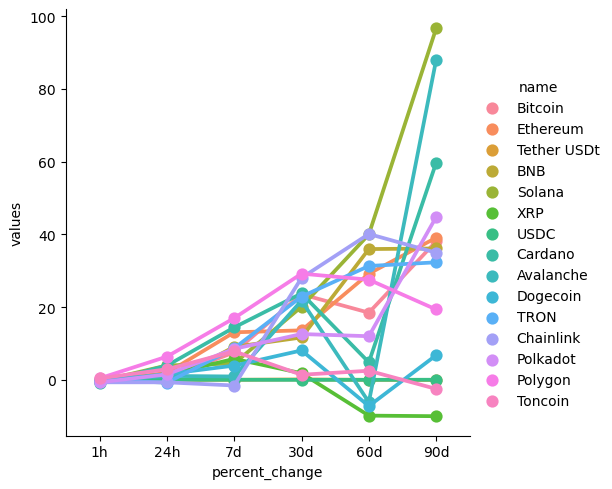

In [59]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [70]:
df10 = df[['name', 'quote.USD.price','Timestamp']]
df10 = df10.query("name =='Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,51712.48709,NaT
0,Bitcoin,51727.97601,2024-02-18 13:46:15.740315
0,Bitcoin,51737.22336,2024-02-18 13:47:34.081977
0,Bitcoin,51748.27021,2024-02-18 13:48:34.506138
0,Bitcoin,51771.63770,2024-02-18 13:49:34.989609
0,Bitcoin,51771.48934,2024-02-18 13:50:35.840406
0,Bitcoin,51775.31106,2024-02-18 13:51:36.347509
